In [1]:
import numpy as np
import sounddevice as sd
import soundfile as sf
import operators
from matplotlib import pyplot as plt

In [2]:
# filename = '/Users/home/Documents/Max 9/Projects/GSOTTgenB1/media/07 Big Bottom.mp3'
# data, fs = sf.read(filename, dtype='float32')  
# sd.play(data[0:48000], fs)
# status = sd.wait()  # Wait until file is done playing

In [3]:
filename = '/Users/home/Documents/Max 9/Projects/GSOTTgenB1/media/07 Big Bottom.mp3'
data, fs = sf.read(filename, dtype='float32')

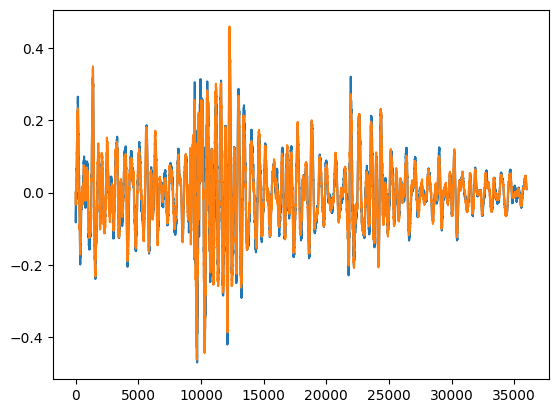

In [4]:
# switch-sound.gendsp
beg = 12000
stp = 48000
t = np.arange(beg, stp, 1, int)
in1 = 1
in2 = 0
hist = operators.history(0)
pk = operators.peek(data, 2)
out = np.zeros((stp-beg, 2))

for x in t:
    switch_in1 = in2
    switch_in2 = hist.get_last_value(x)
    idx = operators.switch(switch_in1, switch_in2)
    out[x-beg][0] = pk.get_sample(idx, 0)
    out[x-beg][1] = pk.get_sample(idx, 1)

sd.play(out, fs)
plt.plot(out)